In [170]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns", None)

In [171]:
data = pd.read_csv(r"C:\Users\hkarr\Downloads\archive (4)\adult.csv")

In [172]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [173]:
data.shape

(48842, 15)

In [174]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [175]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [177]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [178]:
data.duplicated().sum()

52

In [179]:
data.drop_duplicates(inplace = True )

In [180]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [181]:
data.shape

(48790, 15)

In [182]:
categorical_features = data.select_dtypes(include = "object").columns
numerical_features = data.select_dtypes(exclude = "object").columns

In [183]:
for columns in categorical_features:
    print(columns,data[columns].unique())
    print("_______________________________________________________________________--\n")

workclass ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
_______________________________________________________________________--

education ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
_______________________________________________________________________--

marital-status ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
_______________________________________________________________________--

occupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
_______________________________________________________________________--

relatio

In [184]:
data["workclass"] = data["workclass"].replace("?", "Private")
data["occupation"] = data["occupation"].replace("?","Prof-specialty")
data["native-country"] = data["native-country"].replace("?","United-States")

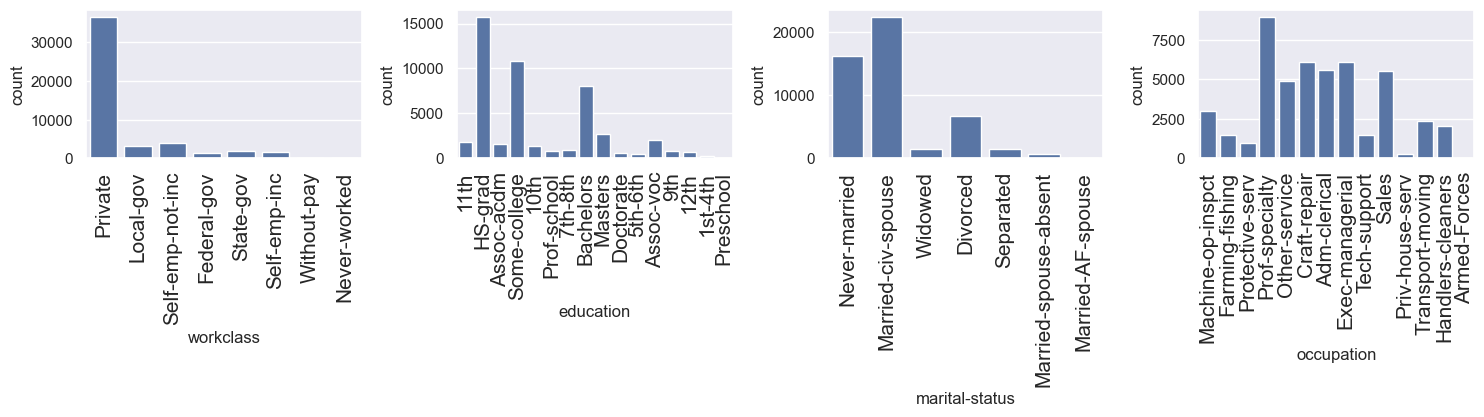

In [185]:
# plt.style.use('fivethiryeight')
sns.set(rc = {"figure.figsize":(15,6)})

columns1 = ["workclass", "education", "marital-status", "occupation"]

for  i in range(0, len(columns1)):
    plt.subplot(2, 4, i+1)
    sns.countplot(x = data[columns1[i]])
    plt.xticks(size = 15, rotation = 90)
    plt.tight_layout()

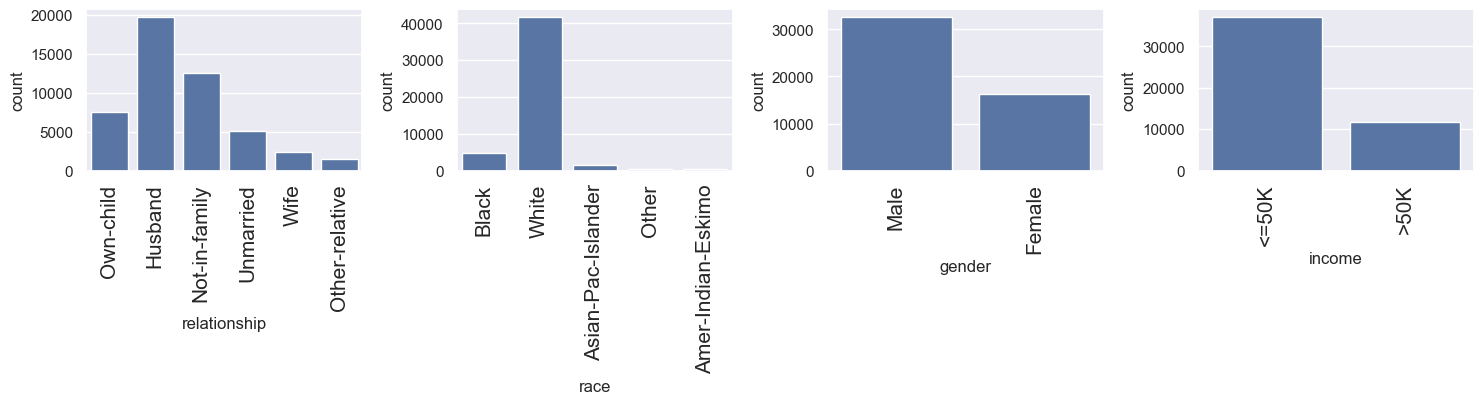

In [186]:
sns.set(rc = {"figure.figsize":(15,6)})

columns2 = ["relationship", "race", "gender", "income"]

for  i in range(0, len(columns2)):
    plt.subplot(2, 4, i+1)
    sns.countplot(x = data[columns2[i]])
    plt.xticks(size = 15, rotation = 90)
    plt.tight_layout()

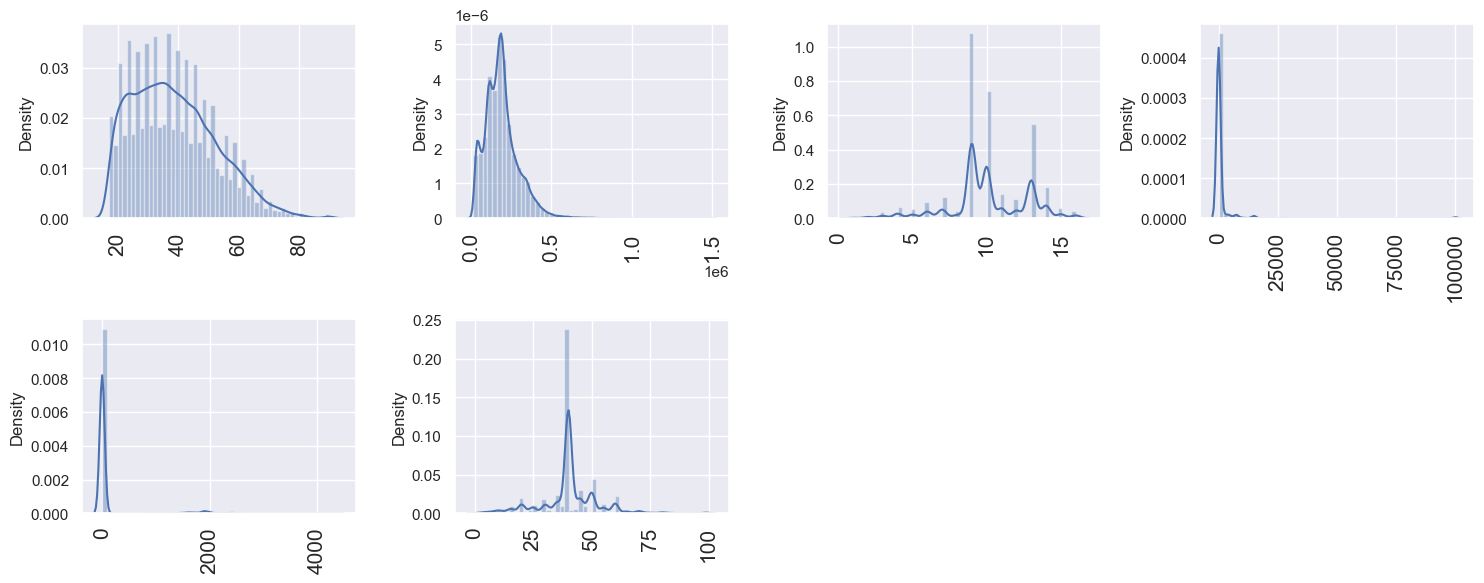

In [187]:
for  i in range(0, len(numerical_features)):
    plt.subplot(2, 4, i+1)
    sns.distplot(x = data[numerical_features[i]])
    plt.xticks(size = 15, rotation = 90)
    plt.tight_layout()

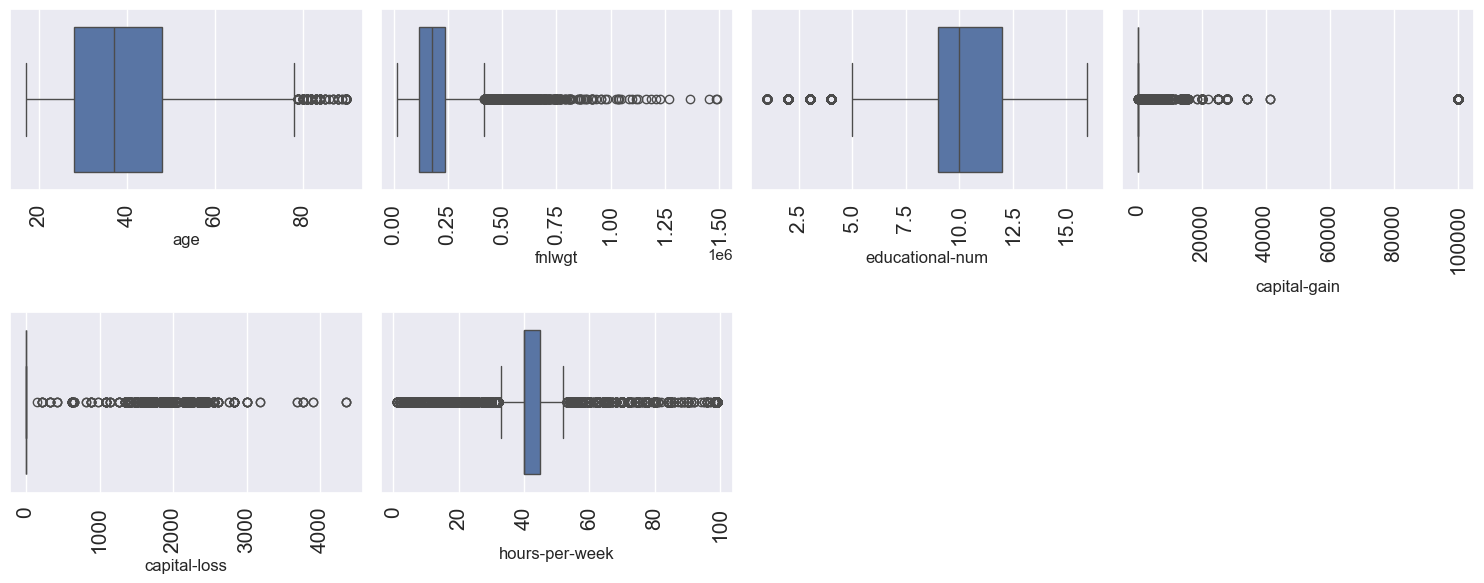

In [188]:
for i in range(0, len(numerical_features)):
    plt.subplot(2,4, i+1)
    sns.boxplot(x = data[numerical_features[i]])
    plt.xticks(size = 15, rotation = 90)
    plt.tight_layout()

<Axes: xlabel='income'>

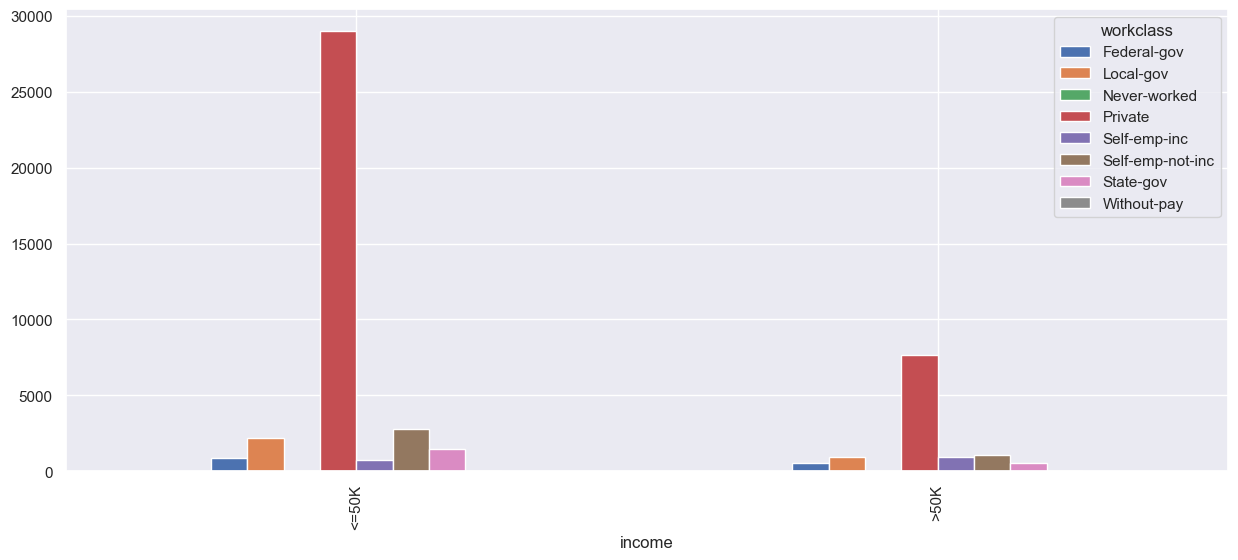

In [189]:
salary = pd.crosstab(data['income'], data['workclass'])
salary.plot(kind = 'bar')

<Axes: xlabel='income'>

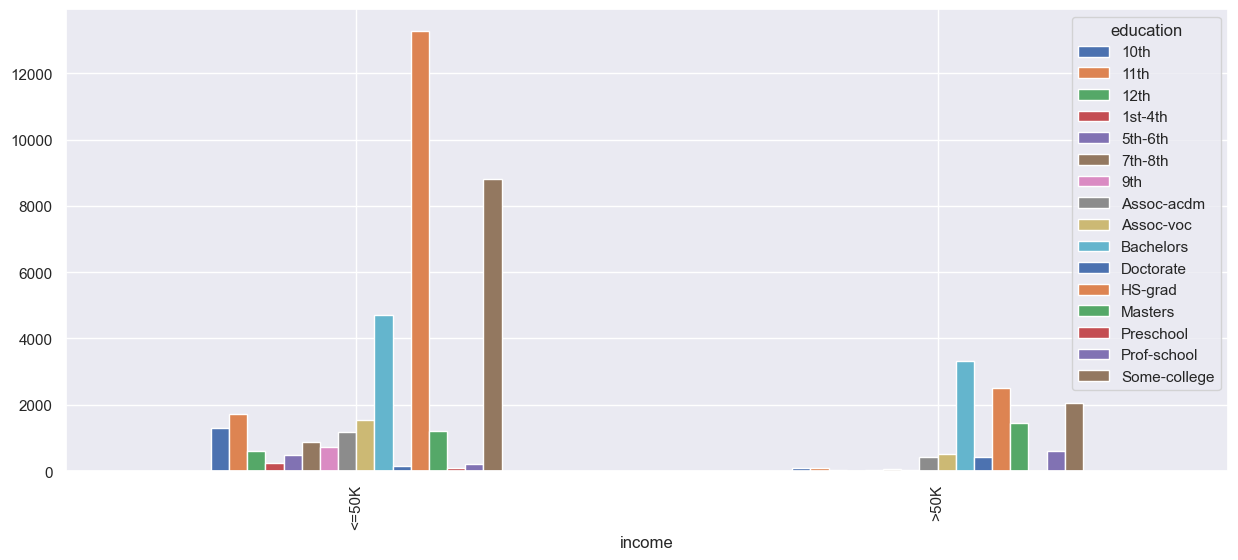

In [190]:
salary = pd.crosstab(data['income'], data['education'])
salary.plot(kind = 'bar')

<Axes: xlabel='income'>

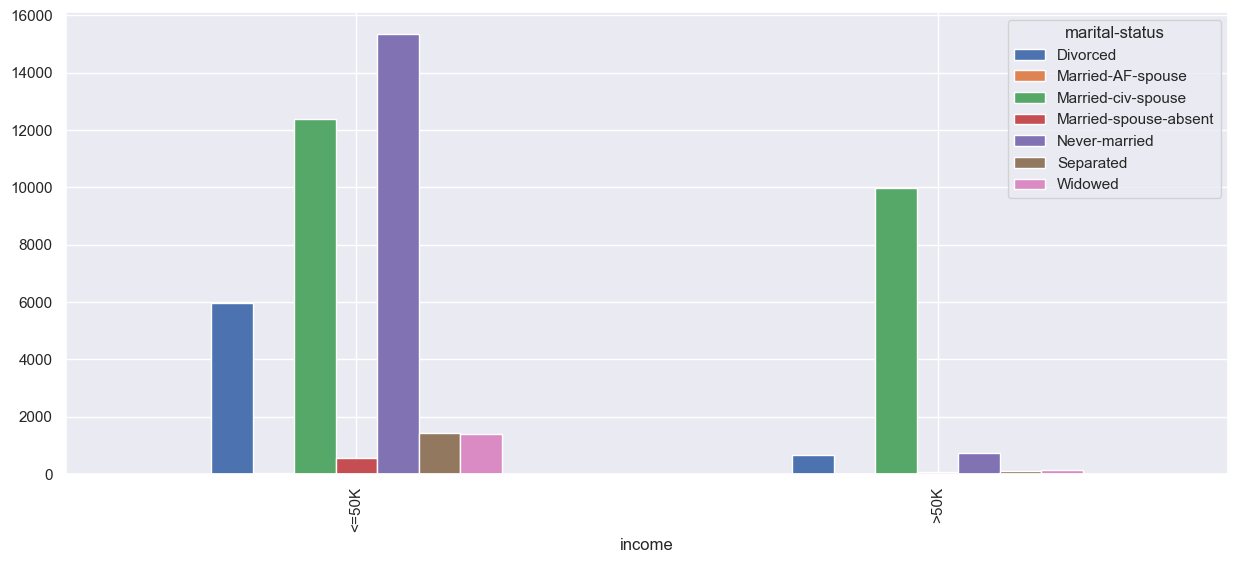

In [191]:
salary = pd.crosstab(data['income'], data['marital-status'])
salary.plot(kind = 'bar')

<Axes: xlabel='income'>

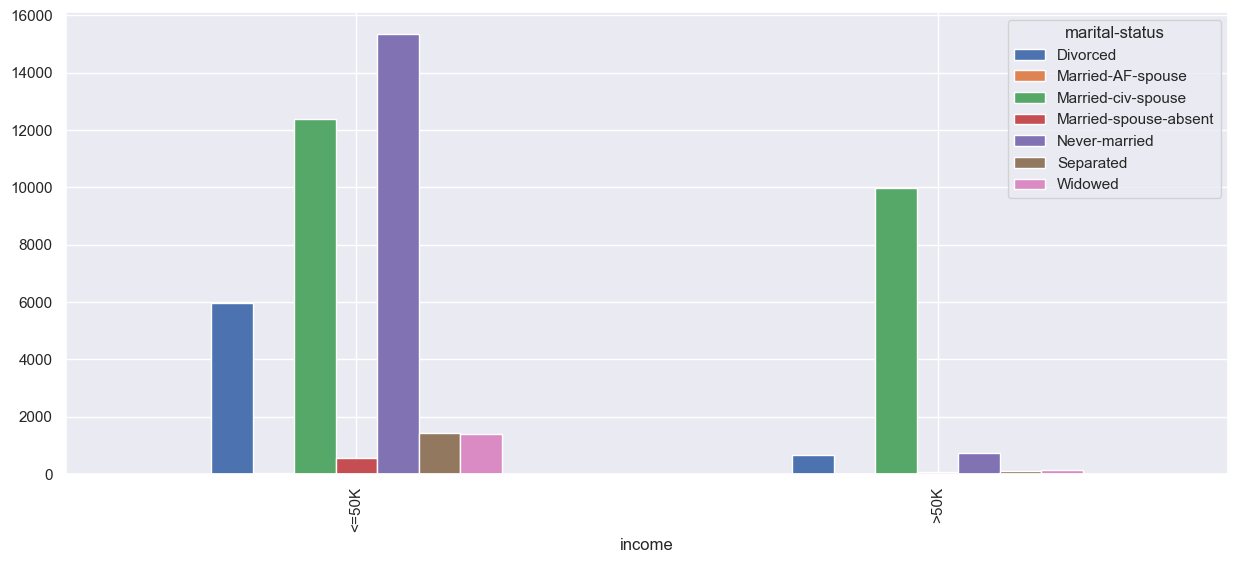

In [192]:
salary = pd.crosstab(data['income'], data['marital-status'])
salary.plot(kind = 'bar')

In [193]:
from sklearn.preprocessing import LabelEncoder

categorical_features = categorical_features.drop('income')

le = LabelEncoder()
for feature in categorical_features:
    le.fit(data[feature])
    data[feature] = le.transform(data[feature])


In [194]:
data["income"] = data["income"].map({'<=50K':0, '>50K':1})
data[categorical_features]

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,3,1,4,6,3,2,1,38
1,3,11,2,4,0,4,1,38
2,1,7,2,10,0,4,1,38
3,3,15,2,6,0,2,1,38
4,3,15,4,9,3,4,0,38
...,...,...,...,...,...,...,...,...
48837,3,7,2,12,5,4,0,38
48838,3,11,2,6,0,4,1,38
48839,3,11,6,0,4,4,0,38
48840,3,11,4,0,3,4,1,38


<Axes: >

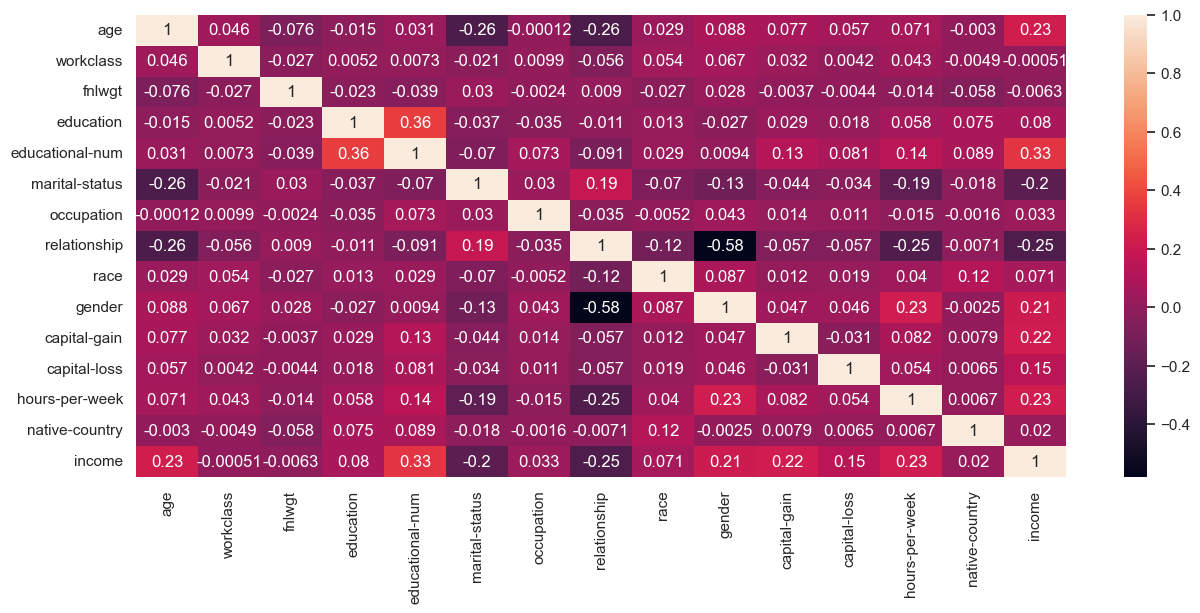

In [195]:
sns.heatmap(data.corr(), annot = True)

In [196]:
data.drop(["education","fnlwgt","native-country"], axis = 1, inplace = True)

In [197]:
data.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
0,25,3,7,4,6,3,2,1,0,0,40,0
1,38,3,9,2,4,0,4,1,0,0,50,0
2,28,1,12,2,10,0,4,1,0,0,40,1
3,44,3,10,2,6,0,2,1,7688,0,40,1
4,18,3,10,4,9,3,4,0,0,0,30,0


In [198]:
x = data.drop("income", axis=1)
y = data["income"]

In [199]:
categorical_features = x.select_dtypes(include = "object").columns
numerical_features = x.select_dtypes(exclude = "object").columns
print(categorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['age', 'workclass', 'educational-num', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


In [200]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [201]:
num_pipeline = Pipeline(
    steps = [
        ("imputer", SimpleImputer (strategy = "median")),
        ("scaler", StandardScaler())
    ]
)

cat_pipeline = Pipeline(
    steps = [
        ("imputer", SimpleImputer (strategy = "most_frequent")),
        ("scaler", StandardScaler())
    ]
)

preprocessor = ColumnTransformer([
    ("num_pipeline", num_pipeline, numerical_features)
])

In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 42)

In [203]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [204]:
def performance_metrics(test, predict):
    ConfMat = print(f"Confusion Matrix: {confusion_matrix(test, predict)}")
    Precision = print(f"Precision: {precision_score(test, predict)}")
    Recall = print(f"Recall Matrix: {recall_score(test, predict)}")
    F1score = print(f"F1 Score: {f1_score(test, predict)}")
    accuracyScore = print(f"Accuracy Score : {accuracy_score[test,predict]}")

    return ConfMat, Precision, Recall, F1score, AccuracyScore

In [210]:
params = {
    "class_weight": ["balanced"],
    "penalty": ["l1", "l2"],
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "solver": ["liblinear", "saga"]
}

In [211]:
grid = GridSearchCV(estimator = lr, param_grid = params, cv = 5, n_jobs = -1, verbose = 3, scoring='accuracy')

In [212]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=3)

In [213]:
grid.best_params_

{'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga'}

In [214]:
grid.score(X_train, y_train)

0.7795142447222791

In [215]:
y_pred = grid.predict(X_test)

In [216]:
accuracy_score(y_test,y_pred)

0.7832547653207624

In [217]:

dr = DecisionTreeClassifier()

In [218]:
param_grid = {
    "class_weight":["balanced"],
    "criterion":['gini',"entropy","log_loss"],
    "splitter":['best','random'],
    "max_depth":[3,4,5,6],
    "min_samples_split":[2,3,4,5],
    "min_samples_leaf":[1,2,3],
    "max_features":["auto","sqrt","log2"]
}

In [219]:
grid_search = GridSearchCV(estimator=dr,param_grid=param_grid,cv=5,scoring="accuracy")

In [220]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [221]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'best'}

In [222]:
grid_search.score(X_train,y_train)

0.7224584955933593

In [223]:
y_pred = grid_search.predict(X_test)

In [224]:
accuracy_score(y_test,y_pred)

0.7239188358270138

In [227]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.67      0.79      7440
           1       0.46      0.90      0.61      2318

    accuracy                           0.72      9758
   macro avg       0.71      0.78      0.70      9758
weighted avg       0.84      0.72      0.74      9758



In [228]:
rf = RandomForestClassifier()

In [229]:
param_grid = {
    "class_weight":["balanced"],
    'n_estimators': [20, 50, 30],
    'max_depth': [10, 8, 5],
    'min_samples_split': [2, 5, 10],
}

In [230]:
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,scoring="accuracy")

In [ ]:
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.score(X_train,y_train)

In [ ]:
y_pred = grid_search.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))